In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.3
/home/phys/villaa/analysis/misc/nrFano_Constraint/mplstyles


# Using New Calculations to Determine $\sigma_Q$

In the note `QEr_2D_joint.ipynb` we found the two-dimensional Q-$\tilde{E}_r$ distribution that we expect, given a certain Edelweiss detector resolution from their 2004 paper [REF]. Here, we compare the Edw. expectation for the yield (Q) width to what one would expect given those two-dimensional distributions. We also compare to data generated in our "physically correct" style (see `ms_correction.ipynb`). 



In [2]:
#get the resolutions for GGA3
import EdwRes as er

aH=0.035
V=4.0
C=0.0
sigHv,sigIv,sigQerv,sigH_NRv,sigI_NRv,sigQnrv = er.getEdw_det_res('GGA3',V,'data/edw_res_data.txt',aH,C)

In [3]:
#make an electron-recoil data set
import observable_simulations as osim
Qer,Erer = osim.simQEr_ER('GGA3',V=V,aH=aH,C=C,F=0.0,HighER=300)

print(Erer)

[ 17.41388044  99.61754259  19.28539929 ...  87.12984922 166.37960749
 154.08881557]


In [4]:
#get statistics given a certain binning
import histogram_yield as hy
#bins = [0,20,40,60,80,100,120,140,160,180,200]
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
bins = np.asarray(bins)
xE = (bins[:-1] + bins[1:]) / 2

bindf,bindfE = hy.QEr_Ebin(Qer, Erer, bins=bins,silent=True)
qbootsigs,qbootsigerrsl,qbootsigerrsu = hy.QEr_Qboot(bindf,bins,silent=True)
qbootcorrs = hy.QEr_QbootBC(bindfE,qbootsigs,xE,20,bins,silent=True)

print(qbootsigs)
print(qbootsigerrsl)
print(qbootsigerrsu)
print(qbootcorrs)

[9.24284727e+01 1.46951210e-01 9.11544516e-02 7.03766175e-02
 6.03177052e-02 5.45596725e-02 5.08350948e-02 4.81014605e-02
 4.64344369e-02 4.53660962e-02 4.44501994e-02 4.37871067e-02
 4.33260514e-02 4.26933497e-02 4.22838552e-02 4.21719296e-02
 4.17894870e-02 4.15454003e-02 4.15752171e-02 4.13013342e-02]
[5.55448633e+01 7.13137185e-04 4.16856657e-04 3.00868139e-04
 2.71541775e-04 2.44897248e-04 2.23492489e-04 2.13115329e-04
 2.08825493e-04 2.04517551e-04 1.94167129e-04 1.95519484e-04
 1.98016198e-04 1.90185729e-04 1.88840322e-04 1.84863901e-04
 1.88664854e-04 1.84421025e-04 1.83929001e-04 1.82350449e-04]
[6.84833057e+01 7.17423842e-04 4.12548505e-04 3.12858561e-04
 2.63589943e-04 2.41297259e-04 2.30871748e-04 2.18342846e-04
 2.09519137e-04 1.99018166e-04 1.93655855e-04 1.97593767e-04
 1.94367866e-04 1.90755512e-04 1.91932949e-04 1.81698950e-04
 1.88208308e-04 1.84261171e-04 1.86011259e-04 1.89470898e-04]
[5.75776077e+02 2.97174602e-01 9.90754319e-01 9.96061478e-01
 9.97568537e-01 9.979

In [5]:
import fano_calc as fc

#recall defaults (filename='test.h5', 
#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
E,sig = fc.RWCalc(filename='data/test.h5')

print(np.shape(E))

GGA3/ER/4.0/1.000E-04/0.035/000/
True
(204,)


In [16]:
# import data from Edelweiss
import pandas as pds
res_data = pds.read_csv("data/edelweiss_NRwidth_GGA3_data.txt", skiprows=1, \
                       names=['E_recoil', 'sig_NR', 'E_recoil_err', 'sig_NR_err'], \
                       delim_whitespace=True)

resER_data = pds.read_csv("data/edelweiss_ERwidth_GGA3_data.txt", skiprows=1, \
                         names=['E_recoil', 'sig_ER', 'sig_ER_err'], \
                         delim_whitespace=True)

resER_data = resER_data.sort_values(by='E_recoil')

print (res_data.head(10))
E_recoil = res_data["E_recoil"]
sig_NR = res_data["sig_NR"]
sig_NR_err = res_data['sig_NR_err']
E_recoil_ER = resER_data["E_recoil"]
sig_ER = resER_data["sig_ER"]
sig_ER_err = resER_data['sig_ER_err']

   E_recoil    sig_NR  E_recoil_err  sig_NR_err
0   16.1946  0.062345      0.946176    0.001157
1   16.4428  0.062345      0.945278    0.001157
2   44.2627  0.046528      0.992477    0.001543
3   24.5012  0.059397      0.992477    0.001185
4   97.7172  0.044847      1.033260    0.002783
5   58.4014  0.050082      0.991830    0.002288
6   34.2156  0.053417      1.033260    0.001102


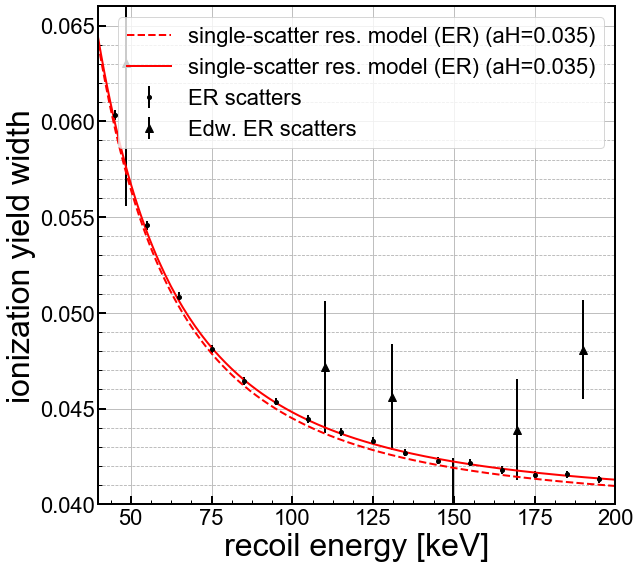

In [20]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

mask = [True, True, False, False, True, True, True, True, True]



X=np.arange(0.1,200,0.1)


ax1.plot(X,sigQerv(X),color='r',linestyle="--",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.plot(E,sig,color='r',linestyle="-",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
             color='k', marker='o',markersize=4,linestyle='none',label='ER scatters', linewidth=2)
ax1.errorbar(E_recoil_ER[mask],sig_ER[mask], yerr=sig_ER_err[mask], \
             color='k', marker='^',markersize=8,linestyle='none',label='Edw. ER scatters', linewidth=2)




ymin = 0.04
ymax = 0.066



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(40, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/ER_match.png')
plt.show()

In [7]:
#do this for NR singles as well
import observable_simulations as osim
import histogram_yield as hy

Q,Ernr,Q_ss,Ernr_ss = osim.simQEr('GGA3',V=V,aH=aH,C=C,highstats=True)
bindf,bindfE = hy.QEr_Ebin(Q_ss, Ernr_ss, bins=bins,silent=True)
qbootsigs_nr,qbootsigerrsl_nr,qbootsigerrsu_nr = hy.QEr_Qboot(bindf,bins,silent=True)
qbootcorrs_nr = hy.QEr_QbootBC(bindfE,qbootsigs_nr,xE,20,bins,silent=True)

print(qbootsigs_nr)
print(qbootsigerrsl_nr)
print(qbootsigerrsu_nr)
print(qbootcorrs_nr)

[6.12888261e+01 8.86564278e-02 5.11002218e-02 3.72620535e-02
 2.97275013e-02 2.52205997e-02 2.26927143e-02 2.08062495e-02
 1.83851451e-02 1.80924683e-02 1.65182744e-02 1.62725482e-02
 1.53211681e-02 1.54589455e-02 1.52586613e-02 1.24500377e-02
 1.67769161e-02 1.46861330e-02 1.64983832e-02 1.66053564e-02]
[3.07555209e+01 1.28411036e-03 9.99560764e-04 9.44687677e-04
 8.85224988e-04 9.01867670e-04 9.10548976e-04 9.43048721e-04
 1.00358832e-03 1.08343218e-03 1.12032751e-03 1.25627475e-03
 1.50712572e-03 1.50009397e-03 2.01028210e-03 1.79910284e-03
 1.97788478e-03 1.91227669e-03 2.61510210e-03 3.17553624e-03]
[3.49605478e+01 1.24461678e-03 1.01216927e-03 9.42728114e-04
 8.97663112e-04 9.20894622e-04 9.38663596e-04 9.66801528e-04
 1.04215169e-03 1.12994136e-03 1.15832774e-03 1.31092035e-03
 1.60060221e-03 1.64755494e-03 2.15635426e-03 1.97731492e-03
 2.24245866e-03 2.21936748e-03 3.25824539e-03 4.44774024e-03]
[3.64570201e+02 1.54544722e-01 9.59359320e-01 9.80237211e-01
 9.86297459e-01 9.892

In [8]:
#get the NR calculations for our yield band
Enr,signr = fc.RWCalc(filename='data/test.h5',band='NR',alpha=(1/18.0))

#Enr,signr = fc.RWCalc(filename='data/test.h5',band='NR')
print(np.shape(Enr))
print(signr[0])

GGA3/NR/4.0/5.556E-02/0.035/000/
True
(200,)
0.16121389987552073


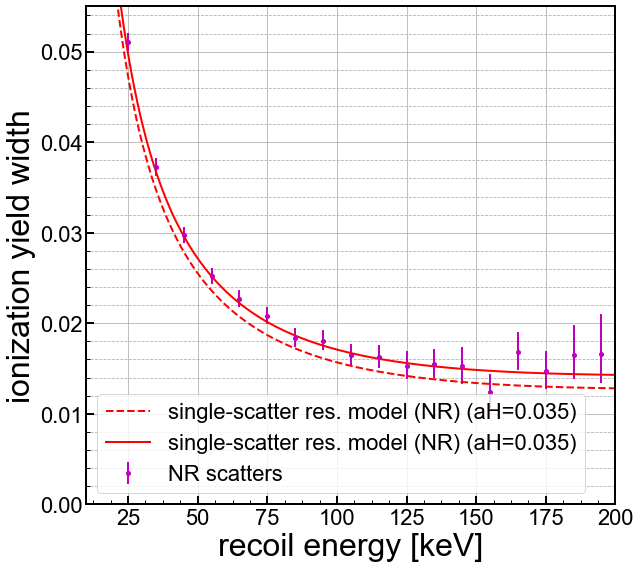

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes





X=np.arange(0.1,200,0.1)


ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
         label='single-scatter res. model (NR) (aH={})'.format(aH))
ax1.plot(Enr,signr,color='r',linestyle="-",linewidth=2, \
         label='single-scatter res. model (NR) (aH={})'.format(aH))
ax1.errorbar(xE,qbootsigs_nr, yerr=(qbootsigerrsl_nr,qbootsigerrsu_nr), \
         color='m', marker='o', markersize=4,linestyle='none',label='NR scatters', linewidth=2)




ymin = 0.00
ymax = 0.055



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NR_ss_match.png')
plt.show()

In [10]:
#make a multiples-scatter plot
bindf_ms,bindfE_ms = hy.QEr_Ebin(Q, Ernr, bins=bins,silent=True)
qbootsigs_nr_ms,qbootsigerrsl_nr_ms,qbootsigerrsu_nr_ms = hy.QEr_Qboot(bindf_ms,bins,silent=True)

In [11]:
#let's make a callable out of the predicted single-scatter resolution
import scipy.interpolate as inter

sigQnr_c = inter.InterpolatedUnivariateSpline(Enr, signr, k=3)
sigQnr_c_v = np.vectorize(sigQnr_c)
print(sigQnrv(150))
print(sigQnr_c_v(150))

0.013394205525342796
0.014841712781795672


In [12]:
#also construct a residual function for use with lmfit
import lmfit as lmf

def residual(params, x, data, eps_data,sigQfunc):
    Cms = params['Cms']
    m = params['m']


    model = np.sqrt(sigQfunc(x)**2 + (Cms+m*x)**2)

    return (data-model) / eps_data

def residual_const(params, x, data, eps_data,sigQfunc):
    Cms = params['Cms']


    model = np.sqrt(sigQfunc(x)**2 + (Cms)**2)

    return (data-model) / eps_data

#do it with lmfit
params = lmf.Parameters()
params.add('Cms', value=0.02)
lmfout = lmf.minimize(residual_const, params, args=(xE, qbootsigs_nr_ms, qbootsigerrsu_nr_ms,sigQnr_c_v))
#print(lmf.fit_report(lmfout))
print('lmfit result--multiples: constant C')
print(lmf.report_fit(lmfout.params))

Cms_const = lmfout.params['Cms'].value

params = lmf.Parameters()
params.add('Cms', value=0.02)
params.add('m', value=0)
lmfout = lmf.minimize(residual, params, args=(xE, qbootsigs_nr_ms, qbootsigerrsu_nr_ms,sigQnr_c_v))
#print(lmf.fit_report(lmfout))
print('lmfit result--multiples: linear C')
print(lmf.report_fit(lmfout.params))

Cms = lmfout.params['Cms'].value
slope = lmfout.params['m'].value

lmfit result--multiples: constant C
[[Variables]]
    Cms:  0.02439208 +/- 7.4127e-04 (3.04%) (init = 0.02)
None
lmfit result--multiples: linear C
[[Variables]]
    Cms:  0.02020584 +/- 0.00135204 (6.69%) (init = 0.02)
    m:    5.3426e-05 +/- 1.5129e-05 (28.32%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(Cms, m) = -0.898
None


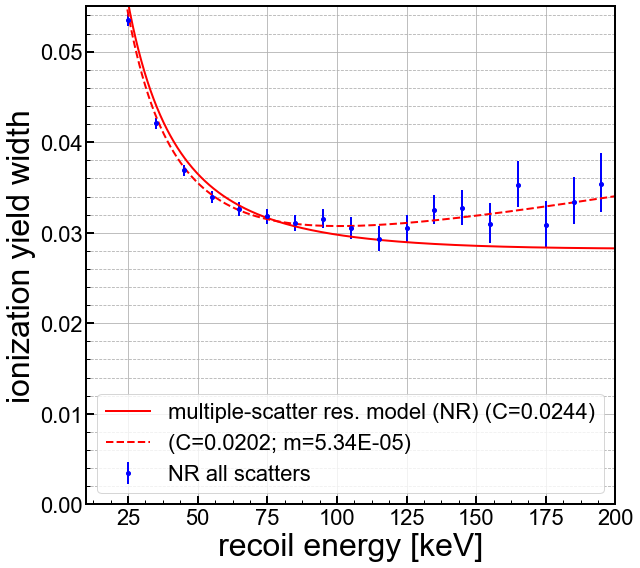

In [13]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes





X=np.arange(0.1,200,0.1)



ax1.plot(X,np.sqrt(sigQnr_c_v(X)**2+Cms_const**2),color='r',linestyle="-",linewidth=2, \
         label='multiple-scatter res. model (NR) (C={:01.3})'.format(Cms_const))
ax1.plot(X,np.sqrt(sigQnr_c_v(X)**2+(Cms+X*slope)**2),color='r',linestyle="--",linewidth=2, \
         label='(C={:01.3}; m={:01.2E})'.format(Cms,slope))
ax1.errorbar(xE,qbootsigs_nr_ms, yerr=(qbootsigerrsl_nr_ms,qbootsigerrsu_nr_ms), \
         color='b', marker='o', markersize=4,linestyle='none',label='NR all scatters', linewidth=2)




ymin = 0.00
ymax = 0.055



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NR_ms_match.png')
plt.show()